In [34]:
from Functional_Fusion.dataset import DataSetHcpTask
from Functional_Fusion.reliability import decompose_subj_group
import numpy as np

In [30]:
base_dir = 'Y:/data/FunctionalFusion_new'

In [31]:
dataset = DataSetHcpTask(f'{base_dir}/HCPur100')
subj_list = ['sub-101309','sub-103111','sub-103414','sub-103818','sub-105014','sub-110411','sub-117122','sub-118730','sub-123117','sub-124422','sub-127630','sub-128632','sub-130013']
data_run,info_run  =dataset.get_data(space='fs32k',ses_id='ses-task',type='CondHalf',subj=subj_list)

part_vec = info_run['half']
cond_vec = info_run['cond_num']

x= decompose_subj_group(data_run,cond_vec=cond_vec,part_vec=part_vec,subtract_mean=False)
x = x/x.sum()

In [32]:
dataset = DataSetHcpTask(f'{base_dir}/HCPur100')
subj_list = ['sub-101309','sub-103111','sub-103414','sub-103818','sub-105014','sub-110411','sub-117122','sub-118730','sub-123117','sub-124422','sub-127630','sub-128632','sub-130013']
data_run,info_run  =dataset.get_data(space='fs32k',ses_id='ses-task2',type='CondHalf',subj=subj_list)

part_vec = info_run['half']
cond_vec = info_run['cond_num']

x2= decompose_subj_group(data_run,cond_vec=cond_vec,part_vec=part_vec,subtract_mean=False)
x2 = x2/x2.sum()

In [36]:
x2

array([[0.27408193, 0.34532994, 0.38058813]])

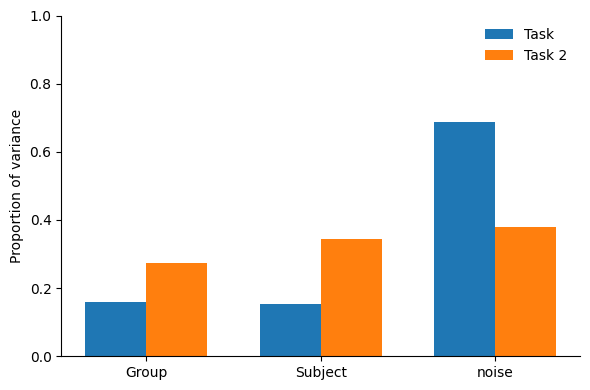

In [39]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.asarray(x).squeeze()
x2 = np.asarray(x2).squeeze()

labels = ['Group', 'Subject', 'noise']
idx = np.arange(len(labels))
bar_width = 0.35

plt.figure(figsize=(6, 4))

plt.bar(idx - bar_width/2, x1, bar_width, label='Task')
plt.bar(idx + bar_width/2, x2, bar_width, label='Task 2')

plt.xticks(idx, labels)
plt.ylabel('Proportion of variance')
plt.ylim(0, 1)
plt.legend(frameon=False)

plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.show()
